Rugved Langhi

Roll no: 28

Batch: A

BE IT

Dataset - Kaggle(https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

In [12]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow sklearn
!pip install tensorflow matplotlib
!pip install tensorflow pandas
!pip install tensorflow pil
!pip install Pillow

  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

data_directory = '/kaggle/input/gtsrb-german-traffic-sign'

for i in range(classes):
    path = os.path.join(data_directory, 'Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [14]:
print(data.shape, labels.shape)

#Splitting training and testing dataset

X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/15
981/981 [==============================] - 79s 79ms/step - loss: 2.3104 - accuracy: 0.4075 - val_loss: 0.8776 - val_accuracy: 0.7478
Epoch 2/15
981/981 [==============================] - 76s 78ms/step - loss: 0.9040 - accuracy: 0.7318 - val_loss: 0.3014 - val_accuracy: 0.9204
Epoch 3/15
981/981 [==============================] - 76s 77ms/step - loss: 0.5327 - accuracy: 0.8401 - val_loss: 0.1808 - val_accuracy: 0.9540
Epoch 4/15
981/981 [==============================] - 76s 77ms/step - loss: 0.3883 - accuracy: 0.8869 - val_loss: 0.1378 - val_accuracy: 0.9616
Epoch 5/15
981/981 [==============================] - 76s 78ms/step - loss: 0.3175 - accuracy: 0.9069 - val_loss: 0.1074 - val_accuracy: 0.9703
Epoch 6/15
981/981 [==============================] - 76s 77ms/step - loss: 0.3000 - accuracy: 0.9149 - val_loss: 0.0917 - val_accuracy: 0.9762
Epoch 7/15
981/981 [==============================] - 77s 78ms/step - loss: 0.2630 - accuracy: 0.9250 - val_loss: 0.0688 - val_accuracy:

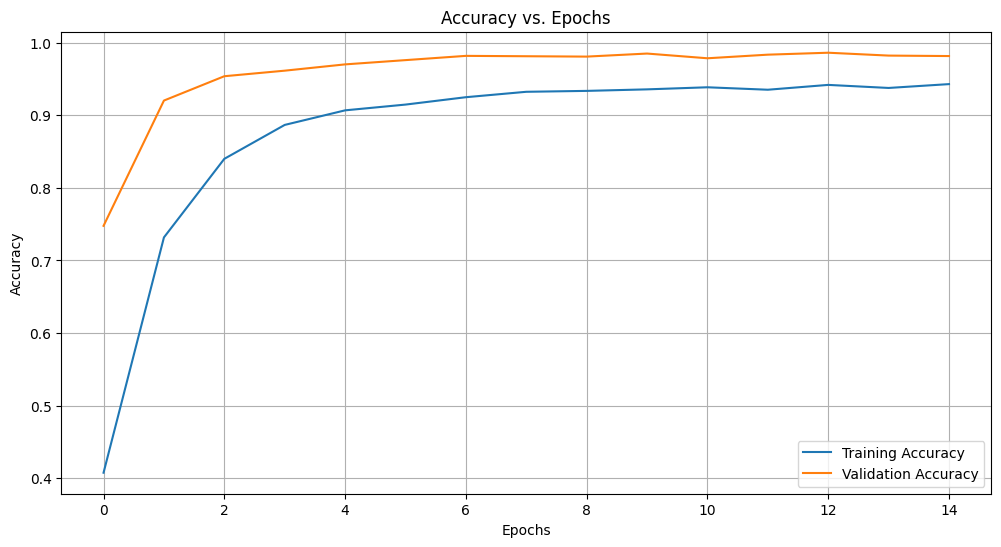

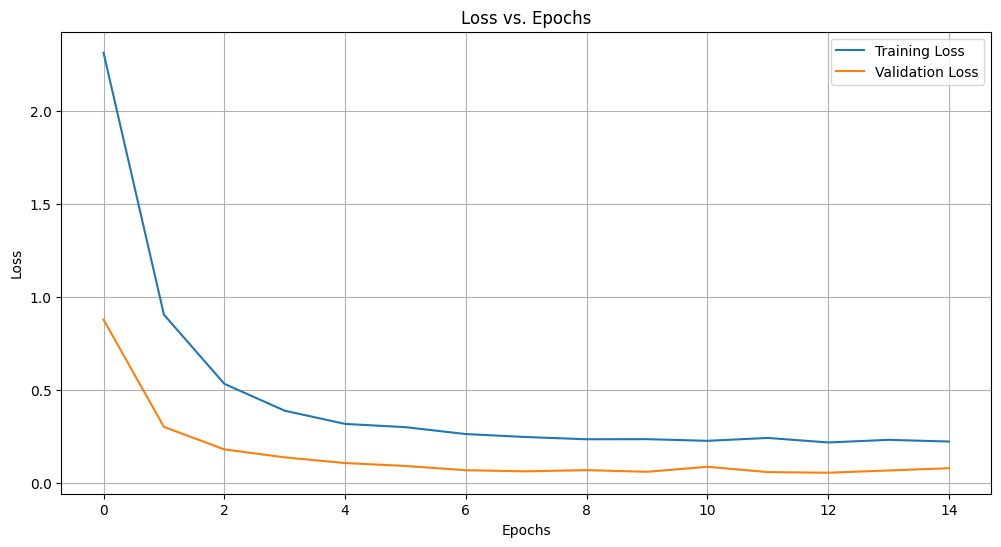

In [17]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.plot(anc.history['accuracy'], label='Training Accuracy')
plt.plot(anc.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(12, 6))
plt.plot(anc.history['loss'], label='Training Loss')
plt.plot(anc.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Testing accuracy on the test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np

# Load the test labels and filenames
test_data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')
labels = test_data["ClassId"].values
filenames = test_data["Path"].values  # Use the actual column name from your CSV

data = []

# Load and preprocess test images
for filename in filenames:
    img_path = os.path.join('/kaggle/input/gtsrb-german-traffic-sign', filename)  # Adjust the path as needed
    image = Image.open(img_path)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

# Predict probabilities for each class
pred_probs = model.predict(X_test)

# Find the class with the highest probability for each sample
pred = np.argmax(pred_probs, axis=1)

# Calculate accuracy with the test data
accuracy = accuracy_score(labels, pred)
print("Test accuracy:", accuracy)

395/395 [==============================] - 6s 15ms/step
Test accuracy: 0.9501187648456056
